# Chapter 1 - Basic statistical analyses

## 1.1 - Pace, Ratings, Four Factors

In [1]:
library(BasketballAnalyzeR)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


If you want to reproduce the figures contained in the book of
Zuccolotto and Manisera (2020) and
if the version of your R machine is >= 3.6.0, you need to type
RNGkind(sample.kind = "Rounding")
at the beginning of your working session



In [2]:
# example(shotchart)

In [3]:
data(package="BasketballAnalyzeR")

Package,Item,Title
<chr>,<chr>,<chr>
BasketballAnalyzeR,Obox,Opponents box scores dataset - NBA 2017-2018
BasketballAnalyzeR,PbP.BDB,Play-by-play dataset - NBA 2017-2018
BasketballAnalyzeR,Pbox,Players box scores dataset - NBA 2017-2018
BasketballAnalyzeR,Tadd,Tadd dataset - NBA 2017-2018
BasketballAnalyzeR,Tbox,Teams box scores dataset - NBA 2017-2018


In [4]:
PbP <- PbPmanipulation(PbP.BDB)

In [5]:
tm <- c("BOS", "CLE", "GSW", "HOU")

In [6]:
selTeams <- which(Tadd$team %in% tm)

FF - fourfactors contains a data frame with Possession, Pace (possesions/minute), Offensive/Defensive Ratings and Four Factors as columns

In [7]:
FF.sel <- fourfactors(Tbox[selTeams,], Obox[selTeams,])

In [8]:
FF.sel

Team,POSS.Off,POSS.Def,PACE.Off,PACE.Def,ORtg,DRtg,F1.Off,F2.Off,F3.Off,F4.Off,F1.Def,F2.Def,F3.Def,F4.Def
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Boston Celtics,8103.68,8110.12,2.045867,2.047493,105.25,101.54,51.76,14.18,21.48,18.75,49.48,14.29,78.44,19.13
Cleveland Cavaliers,8221.96,8229.72,2.083619,2.085585,110.57,109.53,54.70,13.70,20.06,21.41,53.98,13.43,77.27,16.58
Golden State Warriors,8287.92,8457.08,2.100335,2.143203,112.26,104.22,56.91,15.26,21.05,19.48,50.44,13.89,76.31,18.55
Houston Rockets,8208.84,8209.40,2.077661,2.077803,112.23,103.76,55.05,13.83,21.25,23.30,52.14,14.54,79.92,17.12


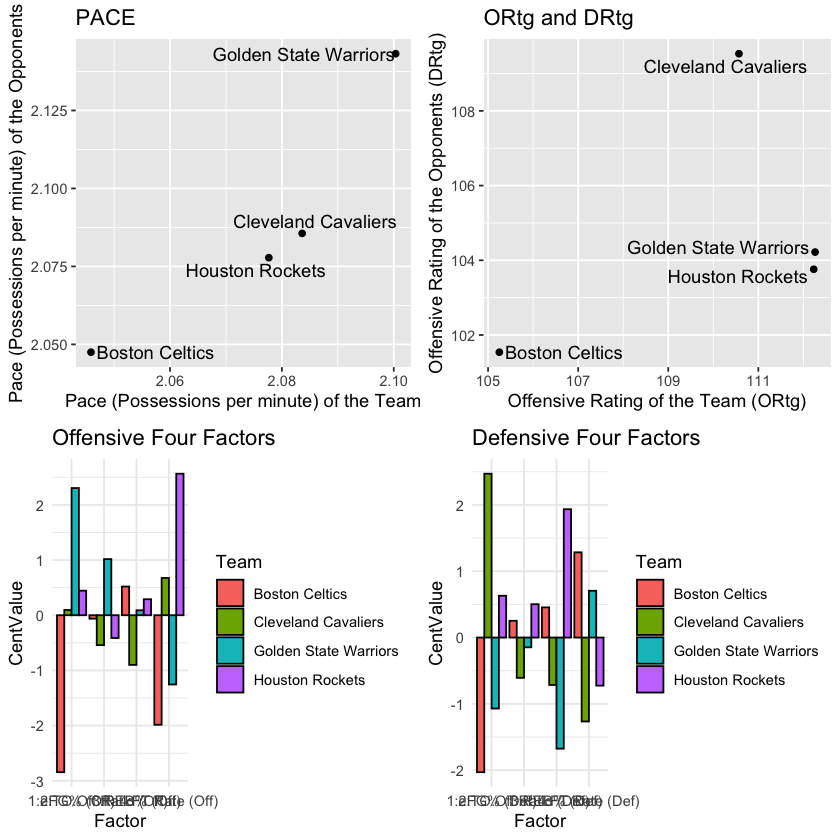

In [9]:
plot(FF.sel)

In [10]:
FF <- fourfactors(Tbox, Obox)

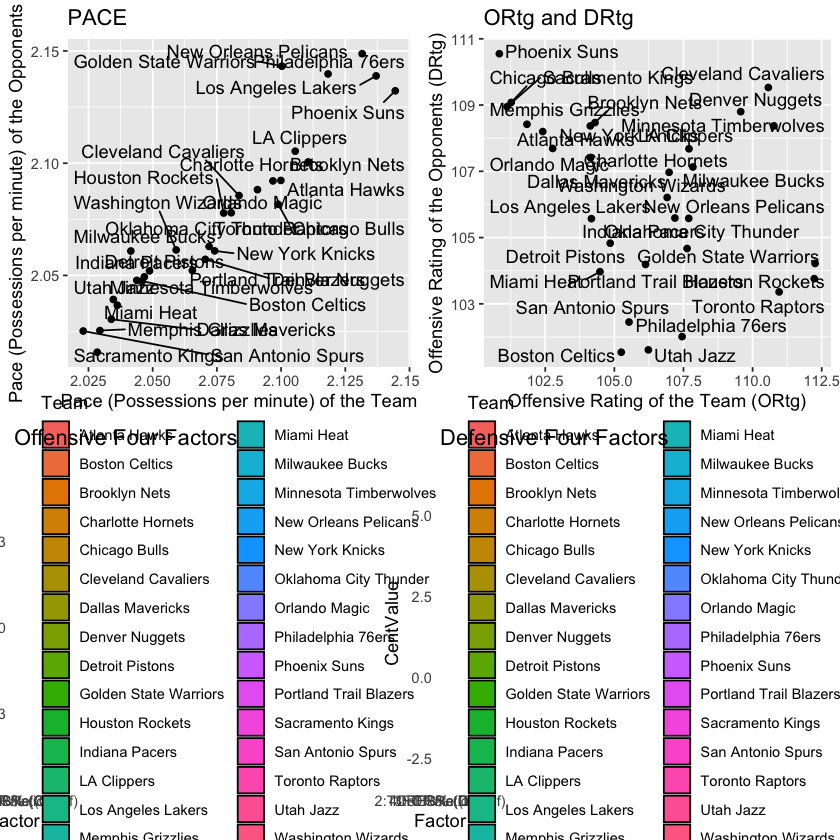

In [11]:
listPlots <- plot(FF)

In [12]:
library(gridExtra) # to present the above graph in grids

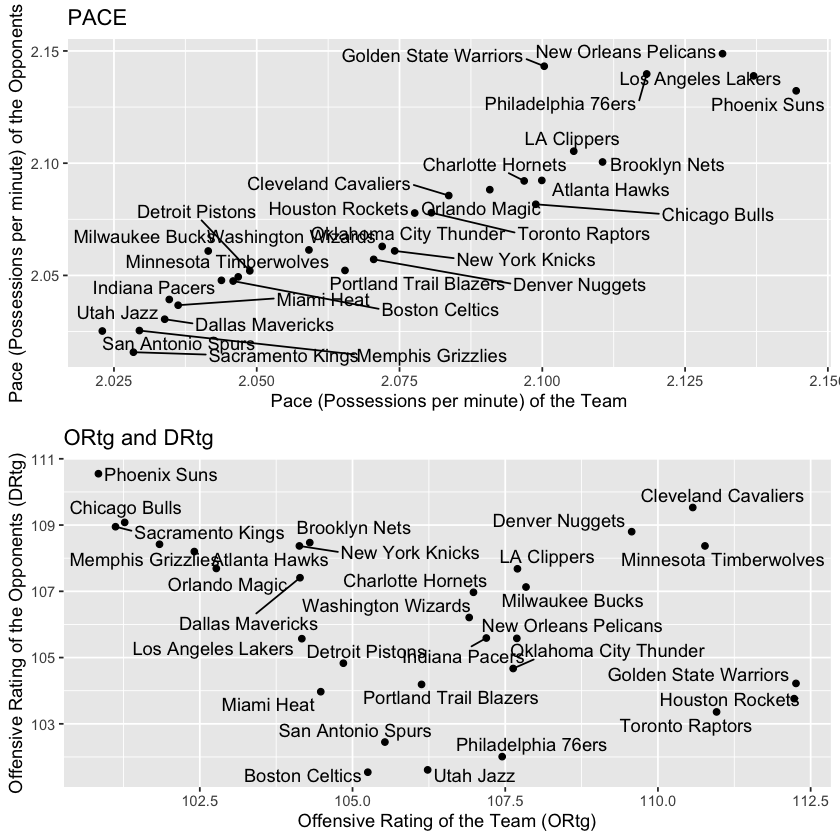

In [13]:
grid.arrange(grobs=listPlots[1:2], ncol=1)

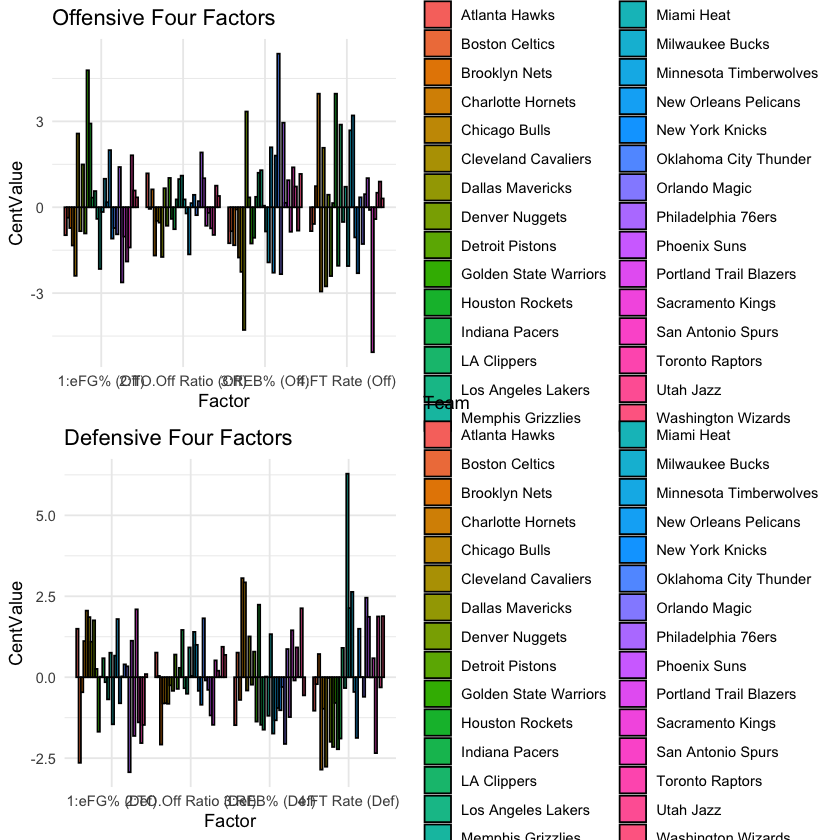

In [14]:
grid.arrange(grobs=listPlots[3:4], ncol=1)

## 1.2 - Bar-line plots

In [15]:
X <- data.frame(Tbox, PTS.O=Obox$PTS, TOV.O=Obox$TOV,
               CONF=Tadd$Conference)

In [16]:
XW <- subset(X, CONF=="W")

In [17]:
labs <- c("Steals", "Blocks", "Defensive Rebounds")

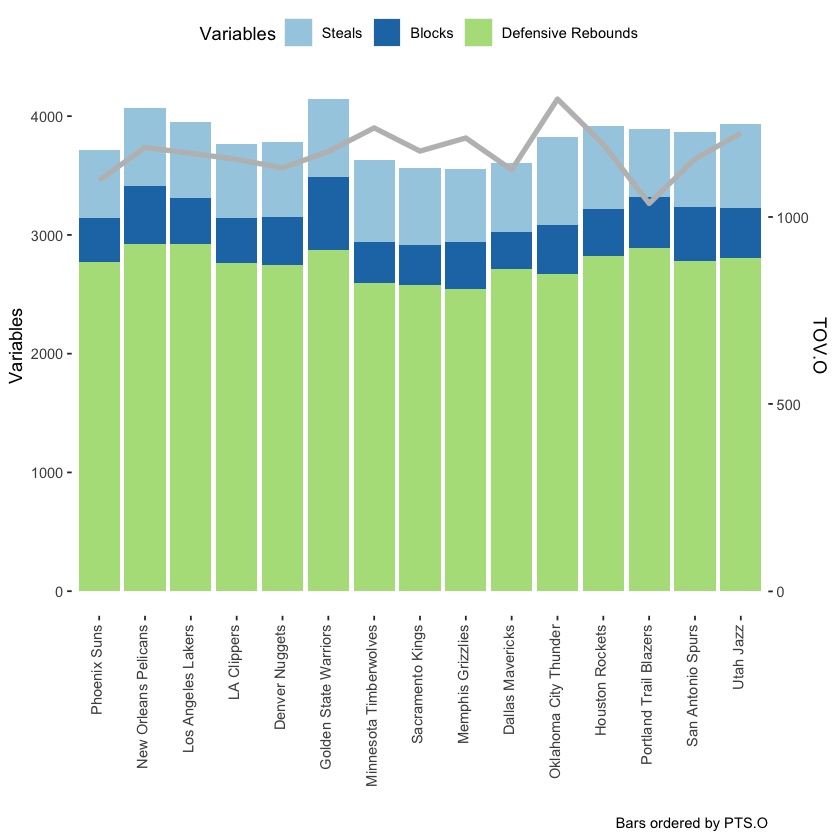

In [18]:
barline(data=XW, id="Team", bars=c("STL", "BLK", "DREB"),
       line="TOV.O", order.by="PTS.O", labels.bars=labs)

Main defensive statistics of the Western Conference NBA teams: steals, blocks, defensive rebounds

The graph does not highlight any evident relationship between statistics and point scored. In fact, the teams towards the left (highest values of points scored by the opponents eg: Phoenix suns PTS.Opp = 9290) are not necessarily those with the lowest bars.

But, player statistics can be represented. Assume we are interested in finding a Houston Rockets player who has played at least 500 minutes, we can draw a bar-line plot for the shooting percentages

In [19]:
Pbox.HR <- subset(Pbox, Team=="Houston Rockets" & MIN>=500)

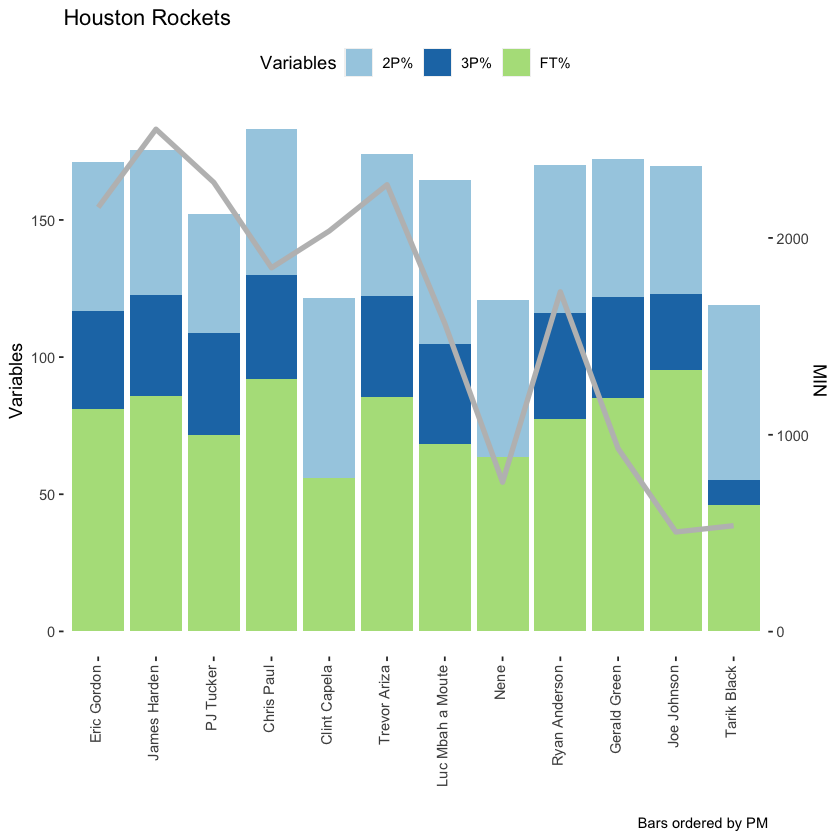

In [20]:
barline(data=Pbox.HR, id="Player",
       bars=c("P2p", "P3p", "FTp"), line="MIN",
       order.by="PM", labels.bars=c("2P%", "3P%", "FT%"),
       title="Houston Rockets")

This shows that players towards the left tend to have the highest played minutes, but not necessarily the best shooting performance

## 1.3 Radial plots

In [21]:
Pbox.PG <- subset(Pbox, Player=="Russell Westbrook" |
                 Player=="Stephen Curry" |
                 Player=="Chris Paul" |
                 Player=="Kyrie Irving" |
                 Player=="Damian Lillard" |
                 Player=="Kyle Lowry" |
                 Player=="John Wall" |
                 Player=="Rajan Rondo" |
                 Player=="Kemba Walker")

In [22]:
attach(Pbox.PG)
X <- data.frame(P2M, P3M, FTM, REB=OREB+DREB, AST,
               STL, BLK)/MIN

In [23]:
detach(Pbox.PG)

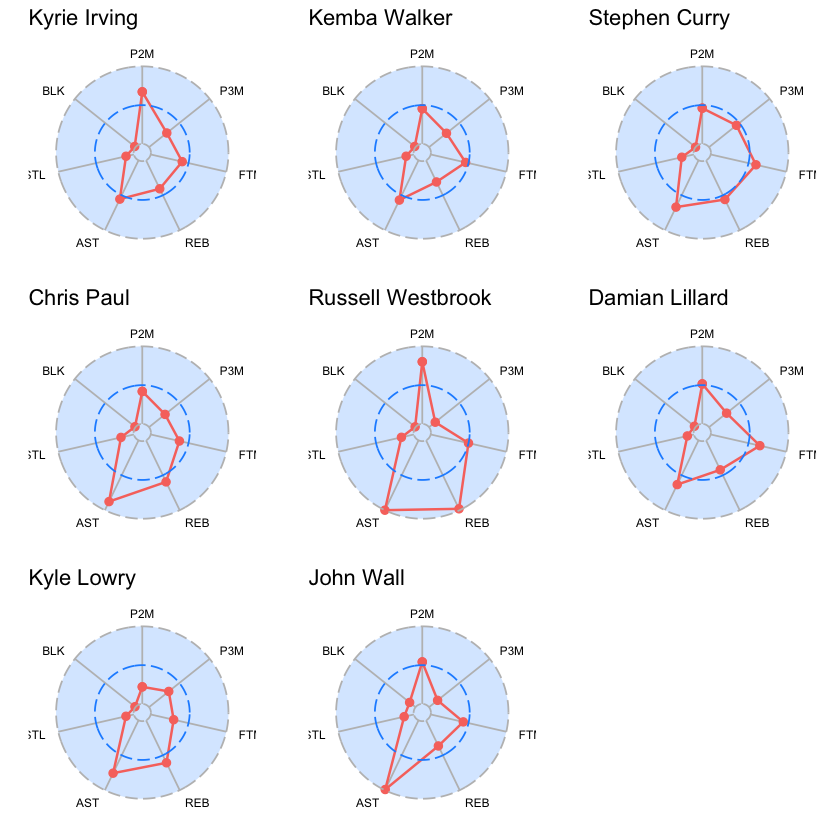

In [24]:
radialprofile(data=X, title=Pbox.PG$Player, std=FALSE)

^ Non-standardized variables. Dashed blue line: midpoint b/w minimum and maximum

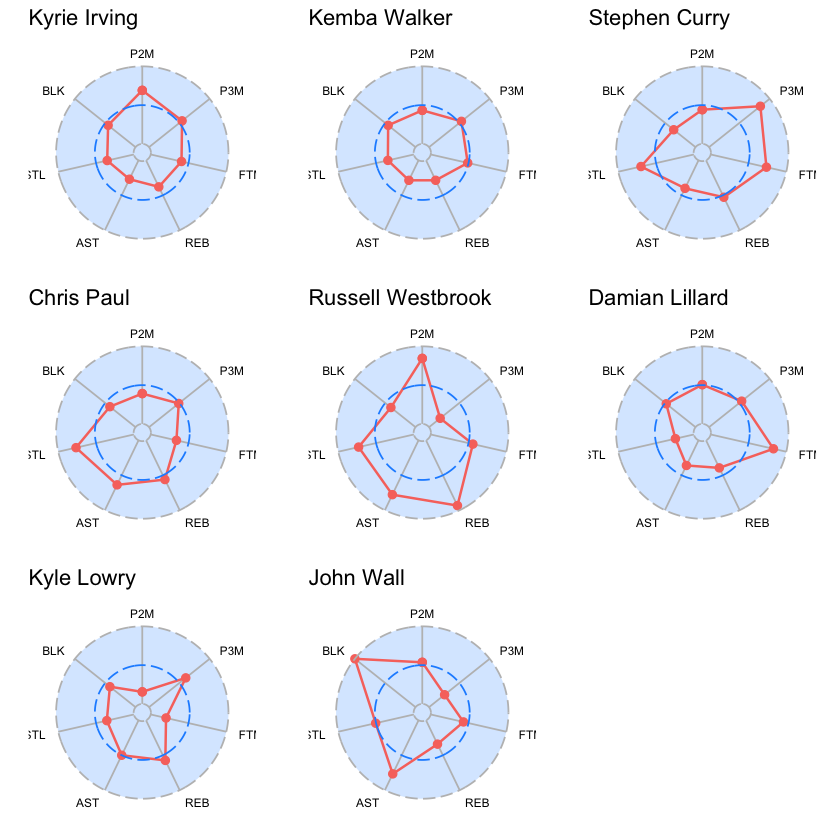

In [25]:
radialprofile(data=X, title=Pbox.PG$Player, std=TRUE)

^ Standardized variables. Dashed blue line: zero (average of each variable)

#### Standardized (aka normalized) using linear transformation

$Z = {X- \mu x \over \sigma x}$


where:

"μx" is the [[mean]] of the population.

"σ" is the [[standard deviation]] of the population.

## 1.4 Scatter plots

In [26]:
Pbox.sel <- subset(Pbox, MIN>= 500)

In [27]:
attach(Pbox.sel)

In [28]:
X <- data.frame(AST, TOV, PTS)/MIN

In [29]:
detach(Pbox.sel)

Goal: investigate the relationship between assists and turnovers per minute of all players who have played at least 500 minutes, also highlight by color codes the points scored per minute

In [30]:
mypal <- colorRampPalette(c('blue', 'yellow', 'red'))

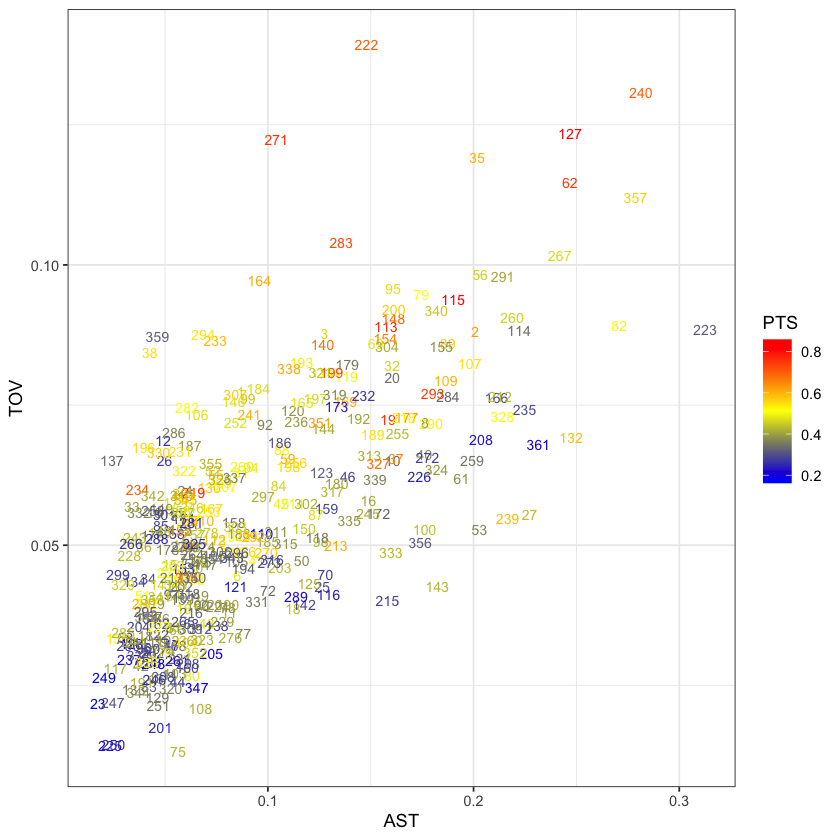

In [31]:
scatterplot(X, data.var=c("AST", "TOV"), z.var="PTS",
           labels=1:nrow(X), palette=mypal)

In [32]:
SAS <- which(Pbox.sel$Team=='San Antonio Spurs')

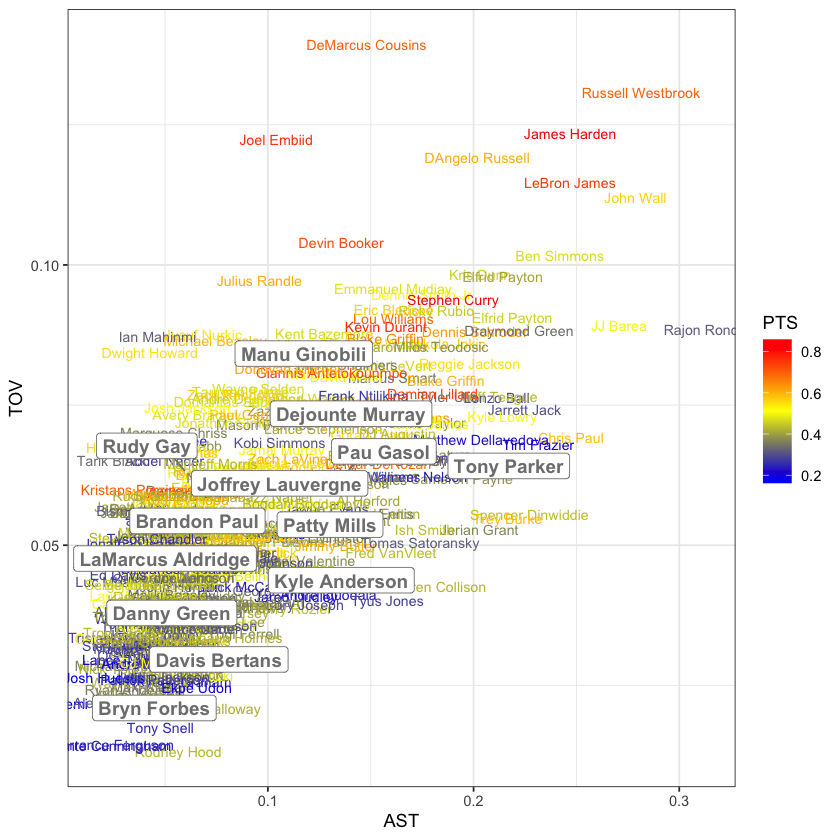

In [33]:
scatterplot(X, data.var=c('AST', 'TOV'), z.var='PTS',
            labels=Pbox.sel$Player, palette=mypal, subset=SAS)

Warning message:
“Removed 331 rows containing missing values (geom_text).”
Warning message:
“Removed 13 rows containing missing values (geom_label_repel).”


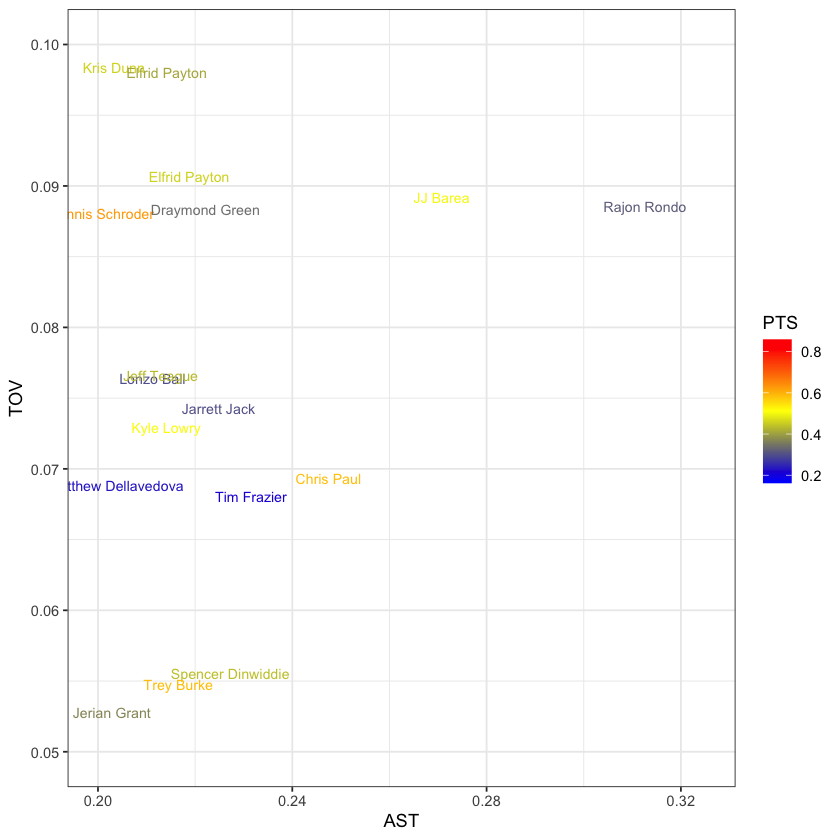

In [34]:
# zoom into [0.20, 0.325] x [0.05, 0.10]
scatterplot(X, data.var=c('AST', 'TOV'), z.var='PTS',
            zoom=c(0.20, 0.325, 0.05, 0.10), # from 0.2 to 0.5 assists, and 0.05 to 0.10 turnovers
            labels=Pbox.sel$Player, palette=mypal, subset=SAS)

What do we find?

Looking at the graph, we note that the number of turnovers tends to increase with increasing assist values. This reflects a clear insight: the more a player moves the ball, the more likely they turn it over.

## 1.5 Bubble plots

What is a Bubble plot?

It is a scatter plot where individual cases (teams and players) are plotted in the plane by means of bubbles instead of points.
Size and color of the bubble can be used to vizualize four features information. 

In [35]:
attach(Tbox)

In [36]:
# P2p - 2pt%
# P3p - 3pt%
# FTp - free throw%
# AS - Attempted shots = 2pt attempts + 3pt attempts + Free throw attempts
X <- data.frame(T=Team, P2p, P3p, FTp, AS=P2A+P3A+FTA)

In [37]:
detach(Tbox)

In [38]:
labs <- c("2-point shots (% made)",
         "3-point shots (% made)",
          "free throw (% made)",
          "Total shots attempted")

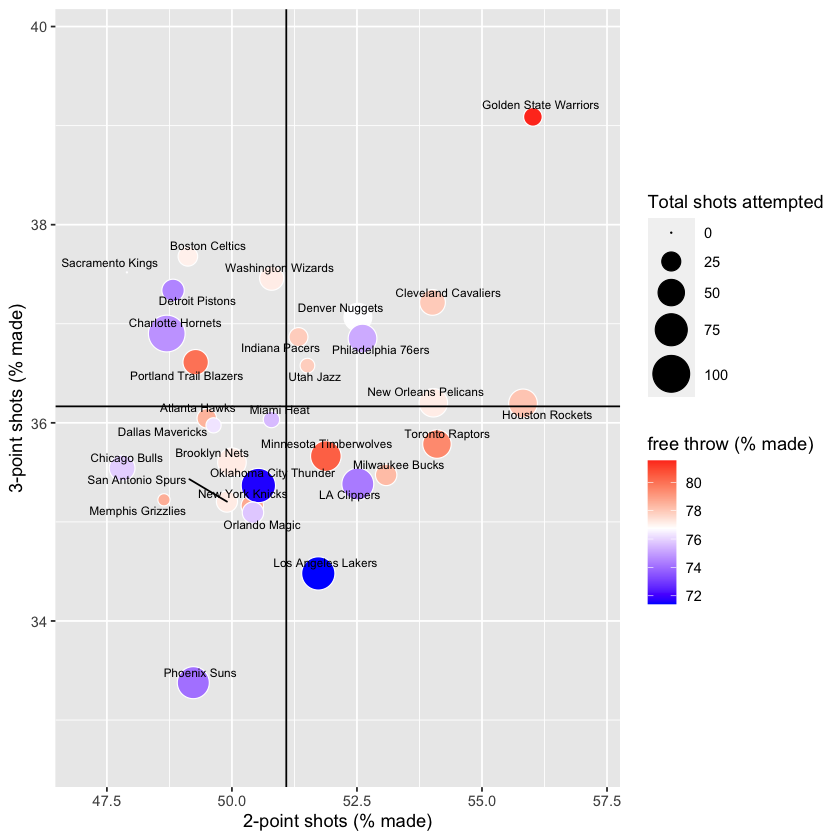

In [39]:
bubbleplot(X, id="T", x="P2p", y="P3p", col="FTp", size="AS", labels=labs)

^ Bubble plot of teams according to shooting percentages and total shots attempted

In [40]:
Pbox.GSW.CC <- subset(Pbox, (Team=="Golden State Warriors" | Team=="Cleveland Cavaliers") & MIN>=500)

In [41]:
attach(Pbox.GSW.CC)

In [42]:
X <- data.frame(ID=Player, Team, V1=DREB/MIN, V2=STL/MIN, V3=BLK/MIN, V4=MIN)

In [43]:
detach(Pbox.GSW.CC)

In [44]:
labs <- c("Defensive Rebounds", "Steals", "Blocks", "Total minutes played")

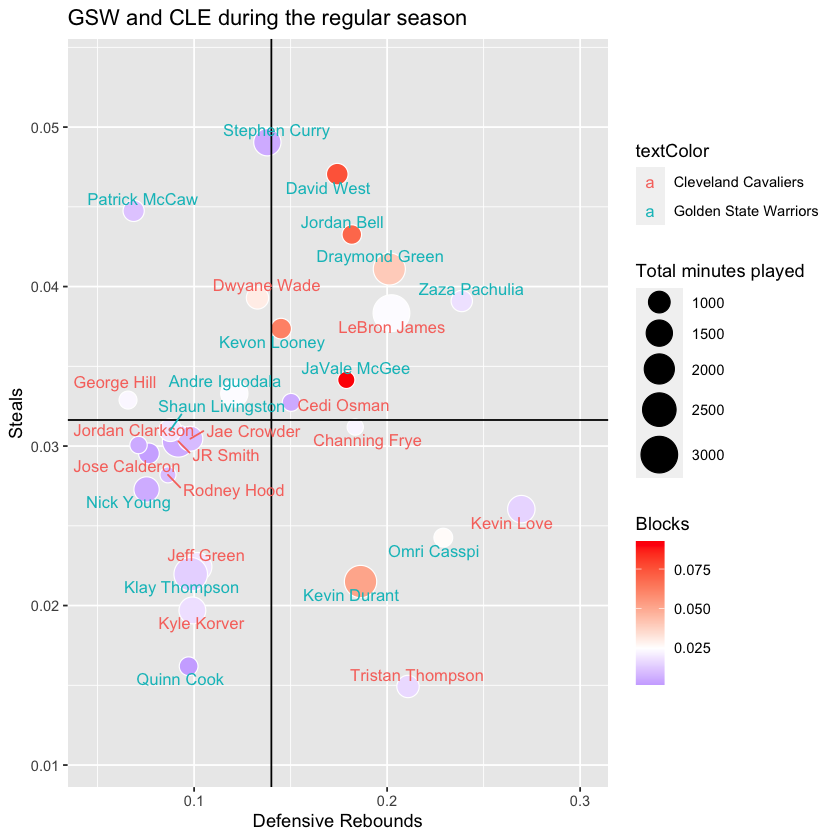

In [45]:
bubbleplot(X, id="ID", x="V1", y="V2", col="V3", 
           size="V4", text.col="Team", labels=labs,
           title="GSW and CLE during the regular season",
           text.legend=TRUE, text.size=3.5, scale=FALSE)

^ Bubble plots of GSW and CLE players according to statistics related to defense (per minute played)

Some interesting evidence!

1. In the top right quadrant, we have players with above average defensive rebounds and steals, along with high blocks, and they are predominantly GSW players. Of course, King LeBron James being the only CLE player amongst those same ratings.
2. Jordan Bell and David West exhibit excellent performance despite having played for fewer minutes
3. Kevin Durant has blocks and rebounds above average, but below avergare steals.
4. Stephen Curry has high steals, worst value for rebounds, and below average blocks. True to chef's position though.

## 1.6 Variability analysis

Variablilty in statistics describes the extent of data deviation from the average, as well as the extent to which they tend to be different from each other.

For given variable $X$ the various indexes of variability are:
1. Range - most commonly used - difference between maximum and minimum
2. Interquartile difference - difference between third and first quartiles
3. Variance - Total Deviance (TD) - 
### $\sigma^2_{X} = \frac{\sum_{i=1} (x_i - \mu_X)^2}{N}$
4. Standard deviation - 
### $\sigma_{X} = \sqrt{\sigma^2_{X}}$

Can be normalized using variation coefficient *VC*
####  $VC = \frac{\sigma_{X}}{\mu_{X}}$       for when values ${x_{i}}$ are all positive - i.e. $min(x_{i} > 0)$
####  $VC = \frac{\sigma_{X}}{|\mu_{X}|}$     for when values ${x_{i}}$ are all negative - i.e. $max(x_{i} < 0)$ . Hardly ever happens, quite uncommon

In basketball, variabilty may be used to analyze the extent to which the players of a team perform differntly from each other according to a given statistic.

Examples: 
PRO - high variability can mean that the team is well balanced according to a given skill - well balanced for a given skill - few players who are excelling in a specific task compared to other players devoted to other tasks
CON - high variability with generic perfromance like, goal percentage or buckets made, means that the team relies too much on few players able to score goals/buckets, while others are far below the team standards


In [46]:
Pbox.OKC <- subset(Pbox, Team=="Oklahoma City Thunder" & MIN>=500)

In [47]:
vrb1 <- variability(data=Pbox.OKC, data.var="P3p", size.var="P3A")

^ Measure variability of 3pt shot percentage of Oklahoma City Thunder players who have atleast played 500 minutes


In [48]:
vrb2 <- variability(data=Pbox.OKC,
                   data.var=c("P2p", "P3p", "FTp"),
                   size.var=c("P2A", "P3A", "FTA"),
                   weight=TRUE  # noramlized variability
                  )

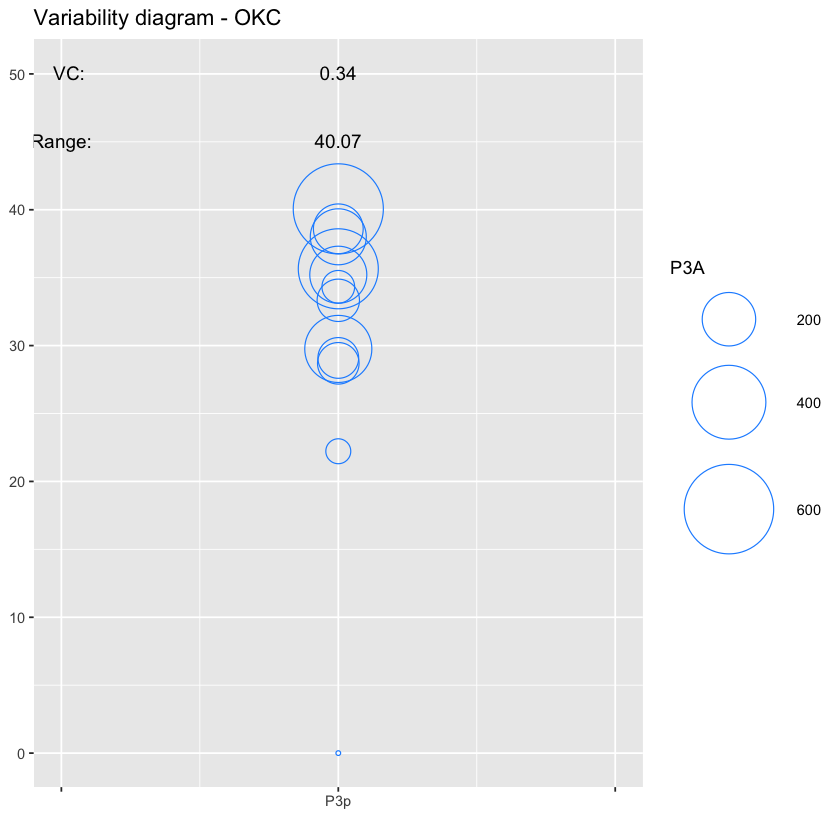

In [49]:
plot(vrb1, title="Variability diagram - OKC")

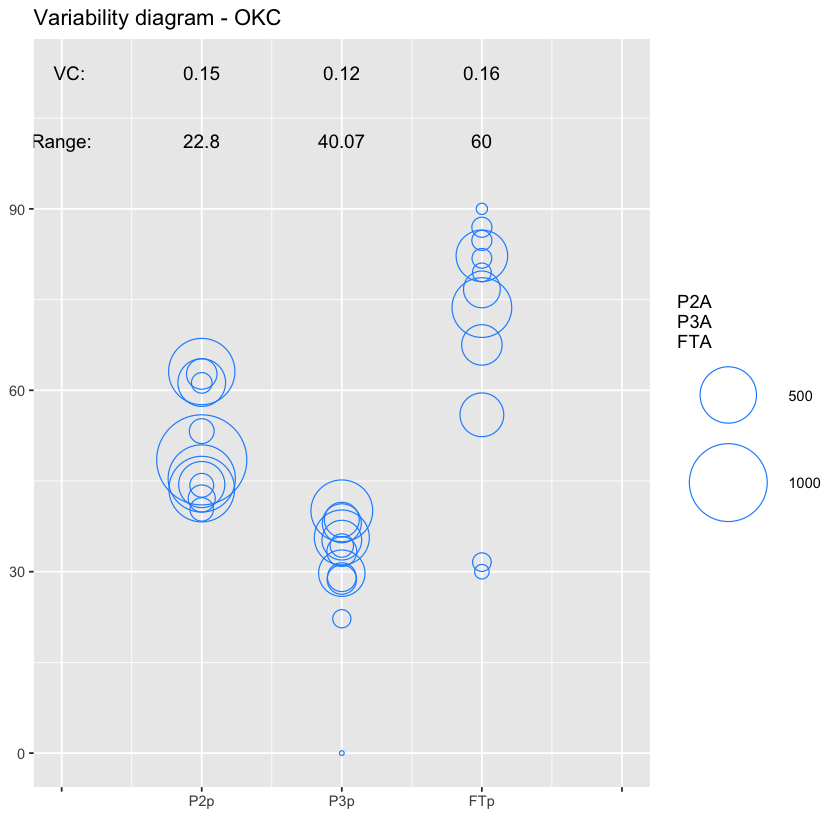

In [50]:
plot(vrb2, title="Variability diagram - OKC")

^ Measure variability of all shot percentage of Oklahoma City Thunder players who have atleast played 500 minutes


## 1.7 Inequality analysis

Inequality is concept originally born in __economics__, to represent the income or wealth distribution of a region or a country.

Another way to explain: Inequality is the extent to which a small fraction of the population tends to dominate, own a big share of total wealth.

Two extremes to inequality:
1. **Equal distribution** - everybody has the same wealth
2. **Maximal inequality** - only one person owns the most of total wealth and the rest of the population does not
    
    
We can use this to investigate inequality within the basketball team.
Examples:
1. Inequality of points made occurs when there are few players who score big part of the total points of the team
2. Equal distribution - all team members score the same ampunt of points

High inequality denotes a team that is not well balanced from the point of view of the scored points, and tends to depend too much on a few players.


In practice, both extreme situation are not reached. 

In order to measure and graphically represent hoow far a practical situation is from totally equal distribution, we use the __Gini__ coefficient and the __Lorenz__ curve.

The Gini coefficient is the an index ranging from __0 (equal distribution) to 100 (maximal inequality)__

Its mathematical definition is based on the Lorenz curve, which plots the fraction y of the total variable (eg: points scored) on the y-axis that is cumulatively referred to the bottom fraction x of the population.

wiki help for more help: https://en.wikipedia.org/wiki/Lorenz_curve

Two lines in the plot refer to maximal inequality and equal distribution. 

![Inequality analysis](../tables/1.6.inequality-analysis:OKC-8-players.png)

^ 8 players of OKC, in decreasing order of scored points: from smallest to the largest number of scored points

We first cumulate players and scored points ($CPl$ and $CPTS$), then we divide respectively by the total number of players and the total scored points in order to obtain cumulative percentages ($CPl%$ and $CPTS%$) informing us about the fraction of total points scored by the first fraction of players.

Example:
We have the first 25% players (2 out of 8) scored 8.39% of the total points, the first 50% (4 out of 8) scored 23.98% of the total points.

#### The __Gini coeffecient__ can be obtained as the ratio of inequality area to the total area between the line of equality and the line of maximal inequality and is computed as:

### $G = \frac{\sum_{i=1}^{N} (CPl\%_i - CPTS\%_i )} {\sum_{i=1} CPl\%_i} . 100 = 38.12\%$

In [51]:
rm(list=ls())

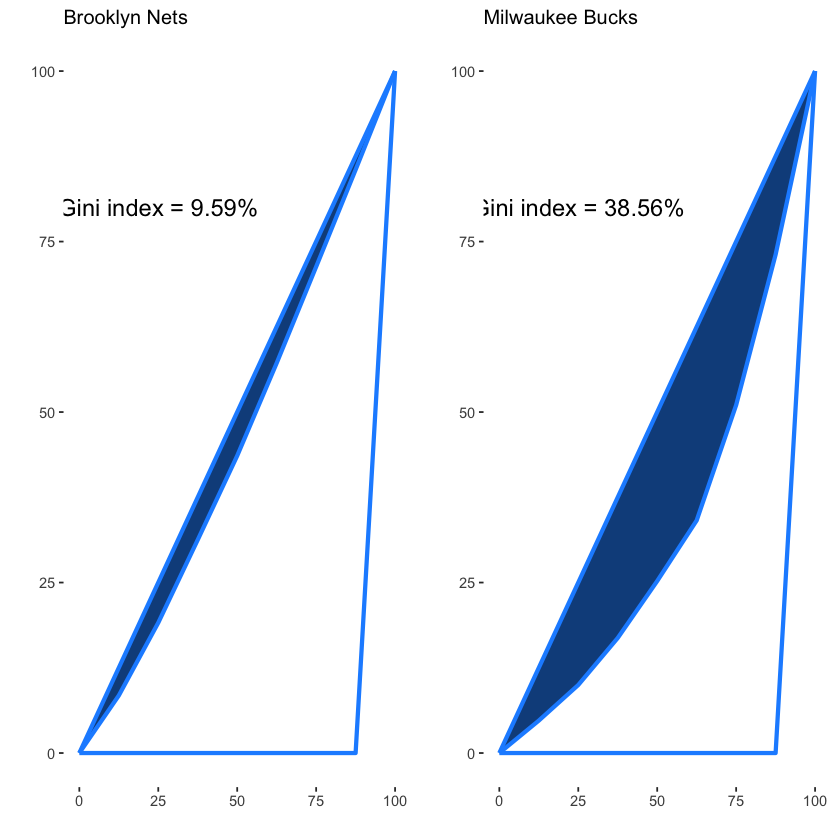

In [52]:
Pbox.BN <- subset(Pbox, Team=="Brooklyn Nets")
ineqBN <- inequality(Pbox.BN$PTS, nplayers=8)
Pbox.MB <- subset(Pbox, Team=="Milwaukee Bucks")
ineqMB <- inequality(Pbox.MB$PTS, nplayers=8)

library(gridExtra)
p1 <- plot(ineqBN, title="Brooklyn Nets")
p2 <- plot(ineqMB, title="Milwaukee Bucks")
grid.arrange(p1, p2, nrow=1)

In [53]:
ineqMB

F,Q
<dbl>,<dbl>
0.000,0.00000000
0.125,0.04756179
0.250,0.09979960
0.375,0.16873747
0.500,0.25223781
0.625,0.34108216
0.750,0.51022044
0.875,0.73092852
1.000,1.00000000


^ The teams with lowest and highest Gini coefficient are the Brooklyn Nets and Milwaukee Bucks

Analysis combining Gini coefficient and the total points made by the teams. Below we cycle through and compute Gini coefficient for all the teams, and then generate a scatter plot

In [54]:
no.teams <- nrow(Tbox)
INEQ <- array(0, no.teams)

for (k in 1:no.teams) {
     Teamk <- Tbox$Team[k]
     Pbox.sel <- subset(Pbox, Team==Teamk)
     index <- inequality(Pbox.sel$PTS, npl=8)
     INEQ[k] <- index$Gini
    }

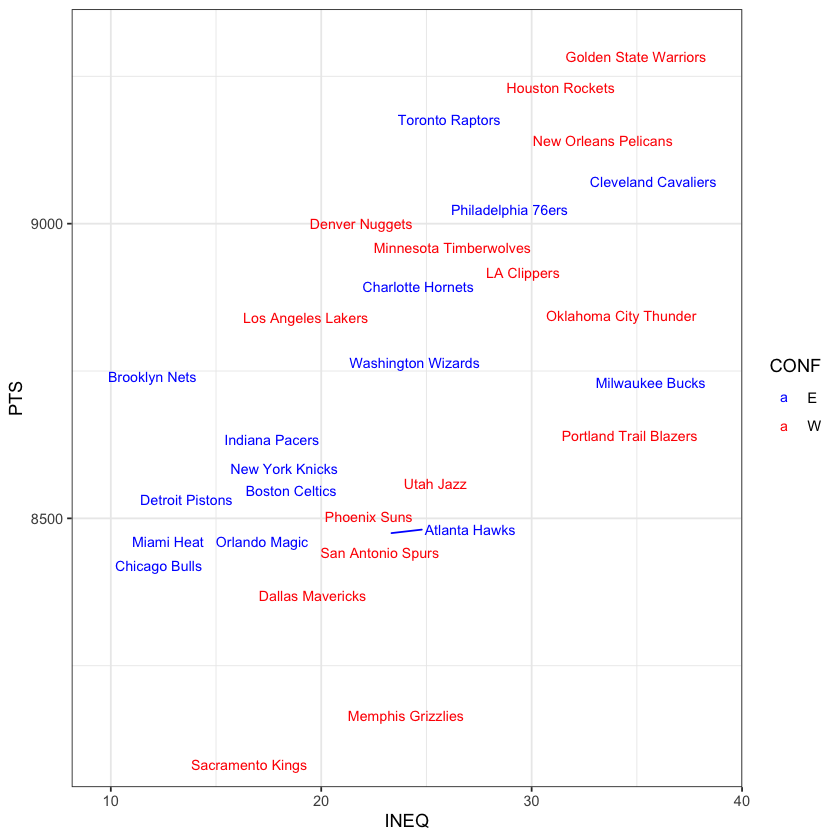

In [55]:
dts <- data.frame(INEQ, PTS=Tbox$PTS, 
                  CONF=Tadd$Conference)
mypal <- colorRampPalette(c("blue", "red"))
scatterplot(dts, data.var=c("INEQ", "PTS"), z.var="CONF",
            labels=Tbox$Team, palette=mypal,
            repel_labels=TRUE)

^ Gini coef (INEQ, x-axis) against total points made (PTS, y-axis) in western and eastern conferences

Interesting find: the two teams with the lowest (BN) and the highest (MB) Gini index have scored almost the same number of points.

In [75]:
rm(list=ls())
PbP <- PbPmanipulation(PbP.BDB)

#### For a given lineup when they played together we can analyse their points scored in a similar way

In [91]:
PbP.GSW <- subset(PbP, team="GSW")

In [92]:
lineup <- c("Stephen Curry", "Kevin Durant", 
            "Klay Thompson", "Draymond Green",
            "Zaza Pachulia")

In [93]:
filt5 <- apply(PbP.GSW[, 4:13], 1,
               function(x) {
                   x <- as.character(x)
                   sum(x %in% lineup)==5 
               })

In [94]:
subPbP.GSW <- PbP.GSW[filt5, ]

In [95]:
PTS5 <- sapply(lineup,
               function(x) {
                   filt <- subPbP.GSW$player==x
                   sum(subPbP.GSW$points[filt], na.rm=T) 
               })

In [96]:
inequality(PTS5, nplayers=5)


,F,Q
,<dbl>,<dbl>
,0.0,0.0000000
Draymond Green,0.2,0.1195029
Zaza Pachulia,0.4,0.2820268
Stephen Curry,0.6,0.5086042
Kevin Durant,0.8,0.7504780
Klay Thompson,1.0,1.0000000


^ Gini coef is __16.97%__ - appreciable tendancy to equality in the points scored by these five players when exactly this lineup is on the field

#### We can apply the same tactic to evaluate inequality of points scored by yhe same set of 5players against the specific team eg: Detroit Pistons

In [116]:
rm(list=ls())
PbP <- PbPmanipulation(PbP.BDB)

In [109]:
PbP.GSW.DET <- subset(PbP, team=="GSW" & oppTeam=="DET")

In [110]:
lineup <- c("Stephen Curry", "Kevin Durant", 
            "Klay Thompson", "Draymond Green",
            "Zaza Pachulia")

In [111]:
filt5 <- apply(PbP.GSW.DET[, 4:13], 1,
               function(x) {
                   x <- as.character(x) 
                   sum(x %in% lineup)==5 
               })

In [112]:
subPbP.GSW.DET <- PbP.GSW.DET[filt5, ]

In [113]:
PTS5 <- sapply(lineup,
               function(x) {
                   filt <- subPbP.GSW.DET$player==x
                   sum(subPbP.GSW.DET$points[filt], na.rm=T) 
               })

In [114]:
inequality(PTS5, nplayer=5)

,F,Q
,<dbl>,<dbl>
,0.0,0.00000
Zaza Pachulia,0.2,0.06250
Draymond Green,0.4,0.12500
Kevin Durant,0.6,0.31250
Stephen Curry,0.8,0.53125
Klay Thompson,1.0,1.00000


^ Gini coef is __48.44%__ - with Klay Thompson accounting for the main part of the points scored by the lineup

## 1.8 Shot charts

In [70]:
subdata <- subset(PbP, player=="Kevin Durant")
subdata$xx <- subdata$original_x/10
subdata$yy <- subdata$original_y/10-41.75

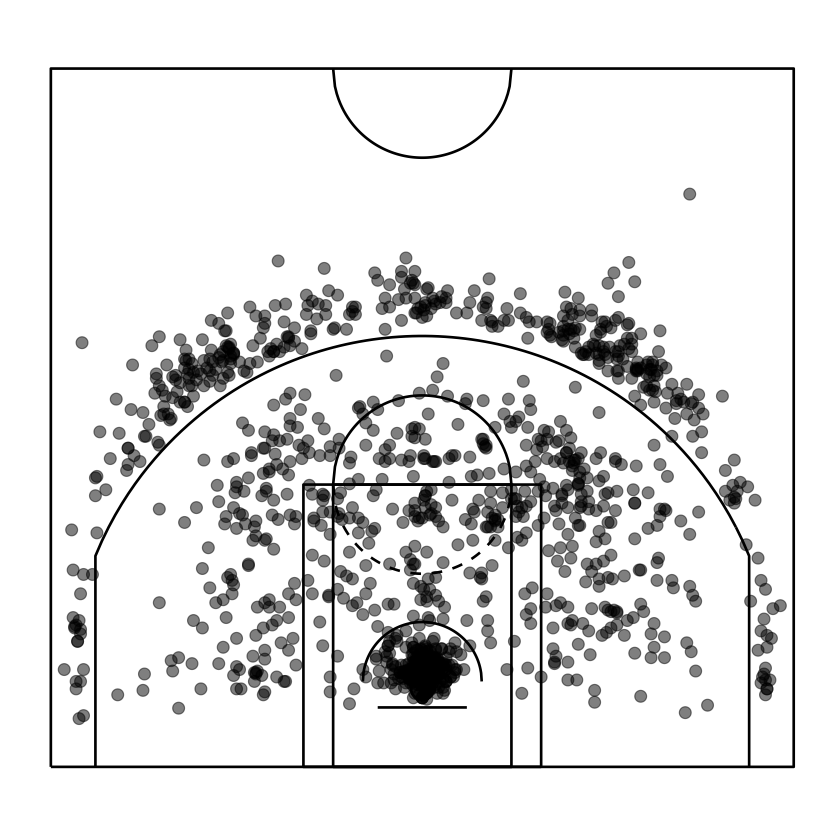

In [71]:
shotchart(data=subdata, x="xx", y="yy", type=NULL,
          scatter=TRUE)

^ Shot chart - Kevin Durant

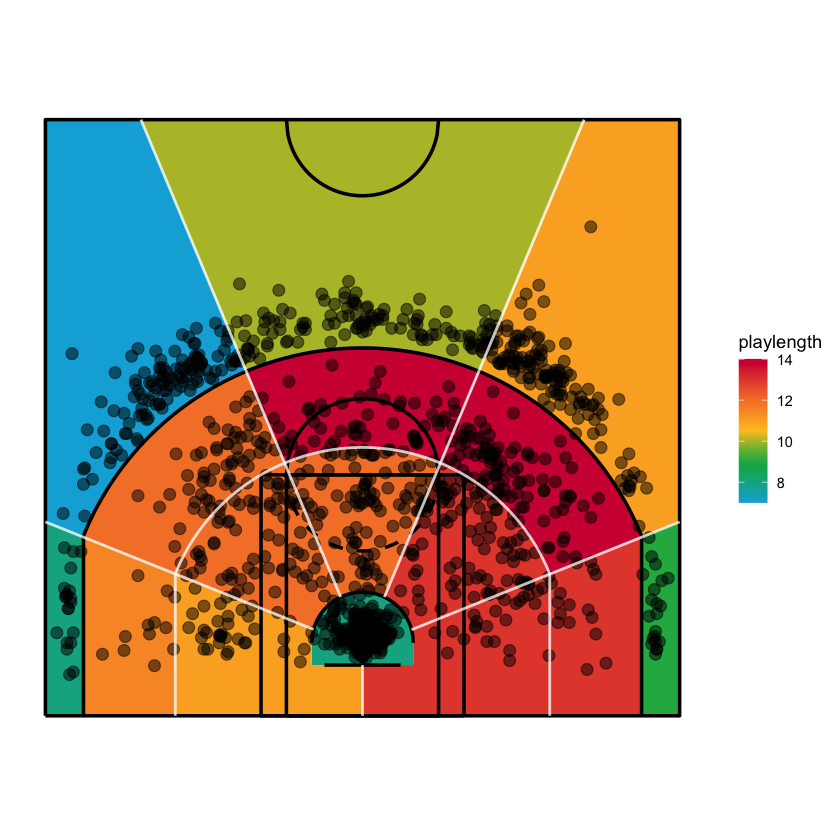

In [72]:
shotchart(data=subdata, x="xx", y="yy", z="playlength",
          num.sect=5, type="sectors", scatter=TRUE)

^ Shot chart - with 16 colored areas according to the length of play at the area - Kevin Durant

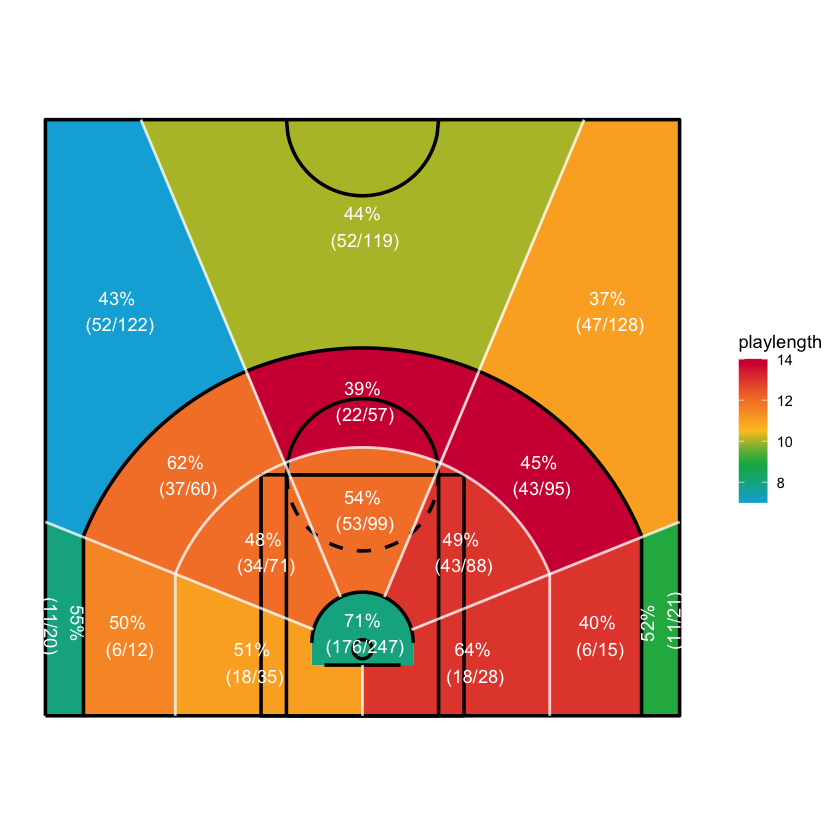

In [73]:
shotchart(data=subdata, x="xx", y="yy", z="playlength",
          num.sect=5, type="sectors", scatter=FALSE, result="result")

^ Shot chart - with 16 colored areas according to the length of play at the area and annotated with shoting statistics - Kevin Durant